In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import hera_sim
import uvtools

%matplotlib inline

/home/bobby/anaconda3/envs/improved_waterfalls/lib/python3.8/site-packages/hera_sim/visibilities/__init__.py:22: UserWarning: HealVis failed to import.
  warnings.warn("HealVis failed to import.")
/home/bobby/anaconda3/envs/improved_waterfalls/lib/python3.8/site-packages/hera_sim/visibilities/__init__.py:27: UserWarning: PRISim failed to import.
  warnings.warn("PRISim failed to import.")
/home/bobby/anaconda3/envs/improved_waterfalls/lib/python3.8/site-packages/hera_sim/visibilities/__init__.py:33: UserWarning: VisGPU failed to import.
  warnings.warn("VisGPU failed to import.")
/home/bobby/anaconda3/envs/improved_waterfalls/lib/python3.8/site-packages/hera_sim/__init__.py:22: FutureWarning: 
In the next major release, all HERA-specific variables will be removed from the codebase. The following variables will need to be accessed through new class-like structures to be introduced in the next major release: 

noise.HERA_Tsky_mdl
noise.HERA_BEAM_POLY
sigchain.HERA_NRAO_BANDPASS
rfi.HERA_

In [2]:
# Mock up some noiselike data
sim = hera_sim.Simulator(n_freq=100, n_times=50, antennas={0: [0,0,0], 1: [14.6,0,0]})
uvd = sim.data
data_shape = uvd.data_array.shape
uvd.data_array = stats.norm.rvs(0, 1, data_shape) + 1j * stats.norm.rvs(0, 1, data_shape)

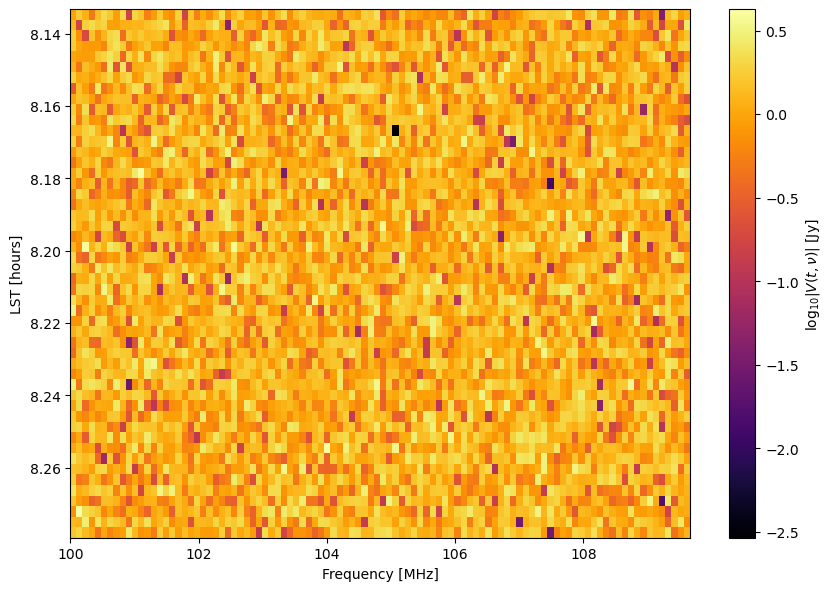

In [3]:
# Make a single labeled waterfall plot with a UVData object and an antpairpol key
fig, ax = uvtools.plot.labeled_waterfall(uvd, antpairpol=(0,1,'xx'))

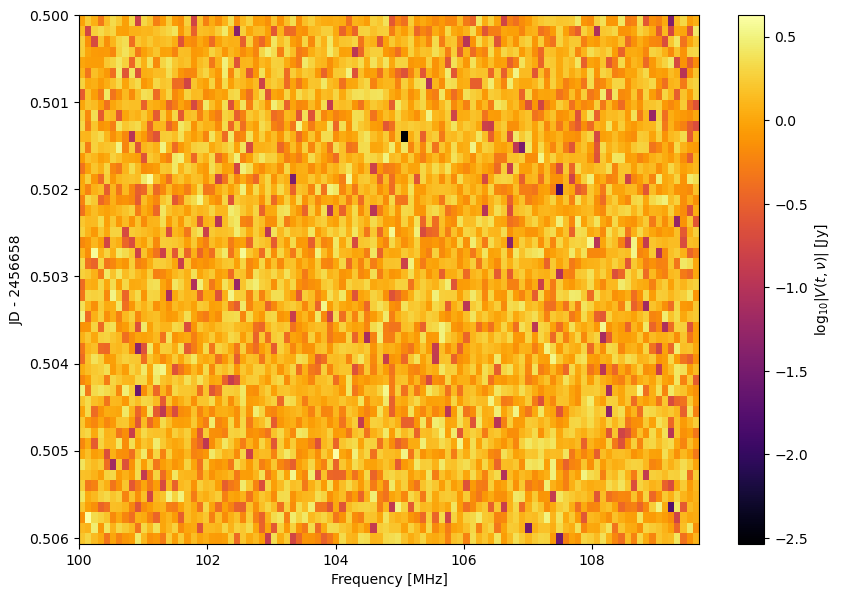

In [4]:
# Make a plot passing arrays instead
data = uvd.get_data(0,1,"xx")
freqs = np.unique(uvd.freq_array)
times = np.unique(uvd.time_array)
lsts = np.unique(uvd.lst_array)

# Passing only times plots against time instead of LST
fig, ax = uvtools.plot.labeled_waterfall(data, freqs=freqs, times=times)

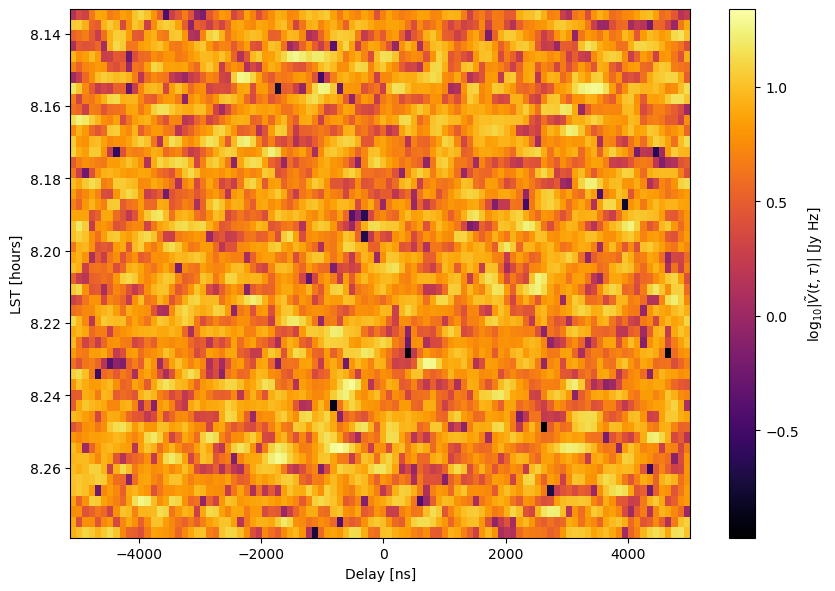

In [5]:
# We can plot the data Fourier transformed along some axis
fig, ax = uvtools.plot.labeled_waterfall(
    uvd,
    antpairpol=(0,1,"xx"),
    fft_axis="freq",
    freq_taper="blackman-harris",
)

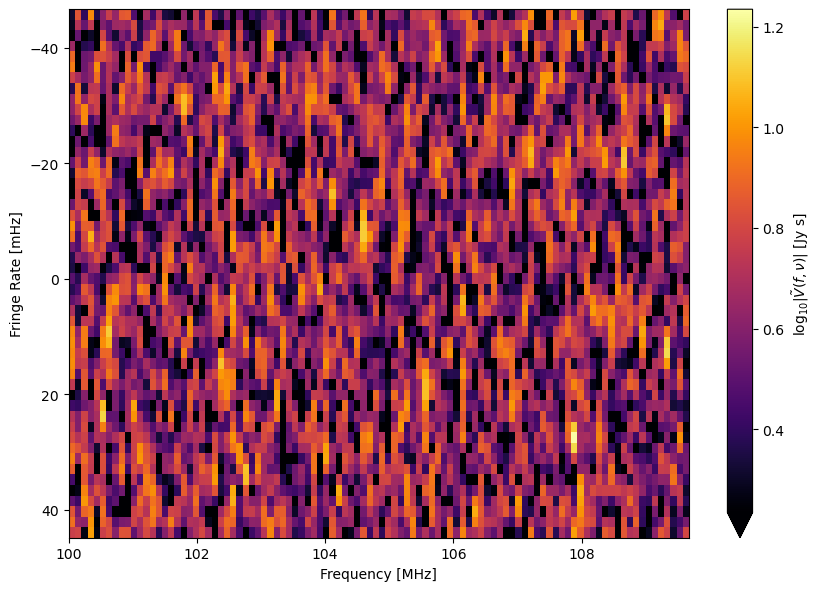

In [6]:
# We can also limit the dynamic range
fig, ax = uvtools.plot.labeled_waterfall(
    uvd,
    antpairpol=(0,1,"xx"),
    dynamic_range=1, # Only show one order-of-magnitude dynamic range
    fft_axis=0, # Can specify FT axis with an integer instead; this is the time-axis
    time_taper="blackman-harris",
)

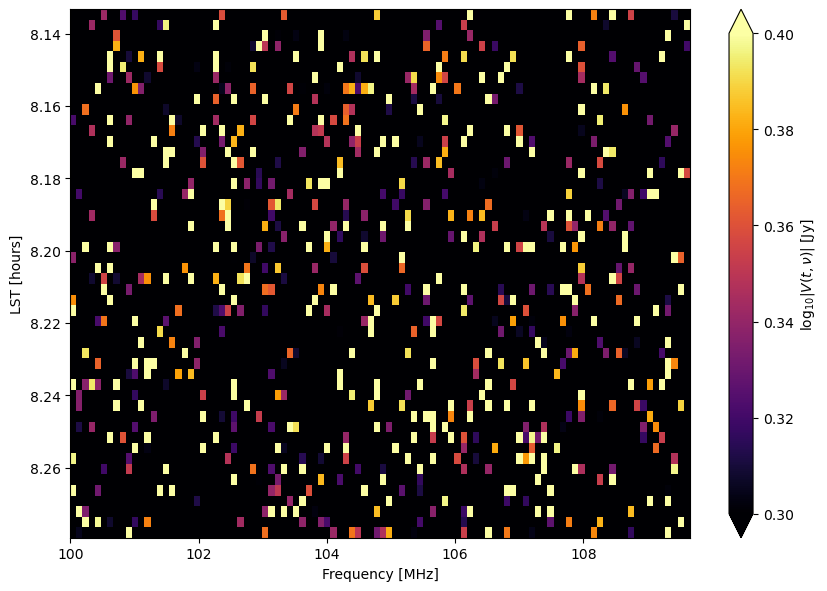

In [7]:
# We can alternatively set the vmin/vmax parameters
fig, ax = uvtools.plot.labeled_waterfall(
    uvd,
    antpairpol=(0,1,"xx"),
    vmax=0.4,
    vmin=0.3,
)

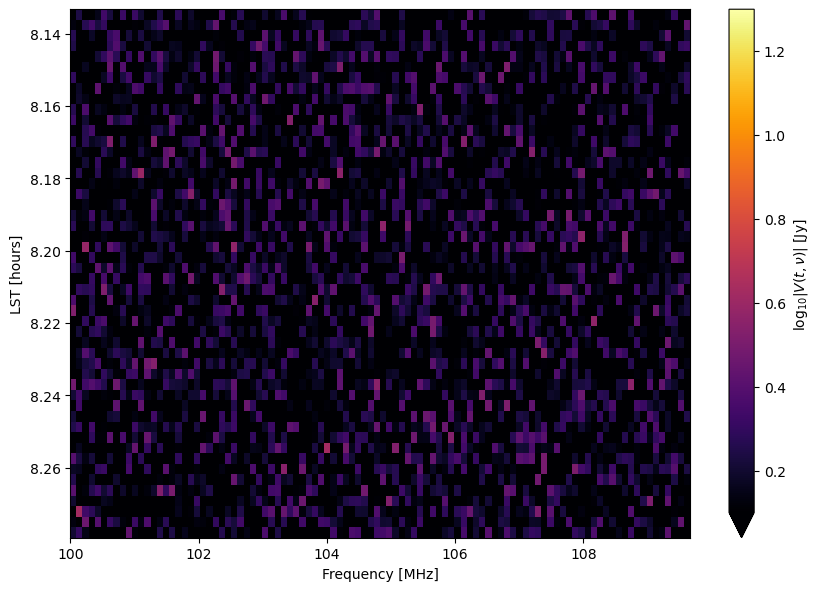

In [8]:
# We can set the dynamic range and just one of vmin/vmax
fig, ax = uvtools.plot.labeled_waterfall(
    uvd,
    antpairpol=(0,1,"xx"),
    vmin=0.1,
    dynamic_range=1.2,
)

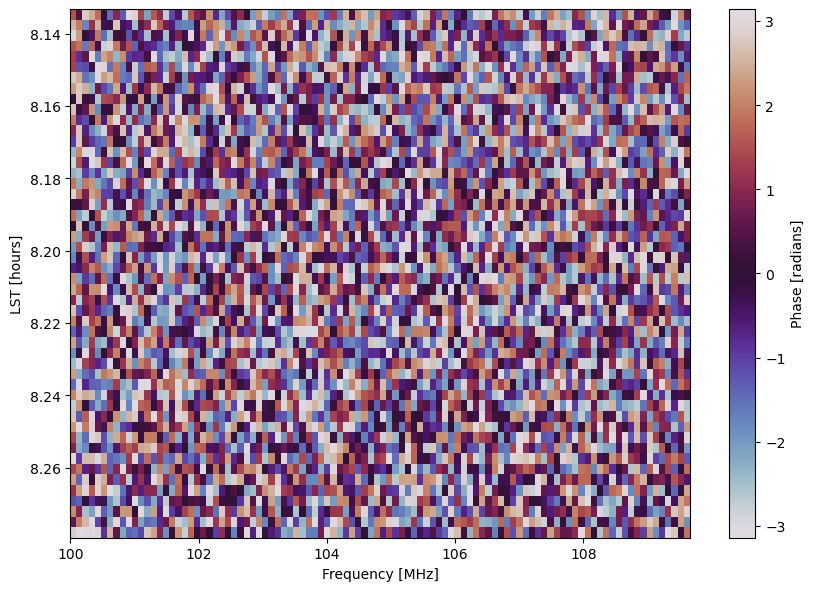

In [9]:
# We can use different plotting modes
fig, ax = uvtools.plot.labeled_waterfall(
    uvd,
    antpairpol=(0,1,"xx"),
    mode="phs",
)

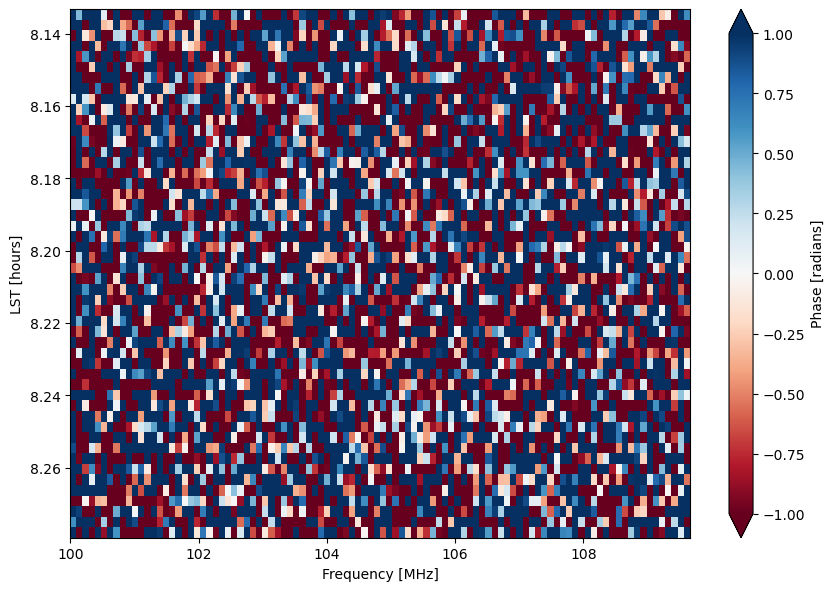

In [10]:
# If we restrict the range of phases in a symmetric way, a diverging colormap
# is used by default
fig, ax = uvtools.plot.labeled_waterfall(
    uvd,
    antpairpol=(0,1,"xx"),
    mode="phs",
    vmin=-1,
    vmax=1
)

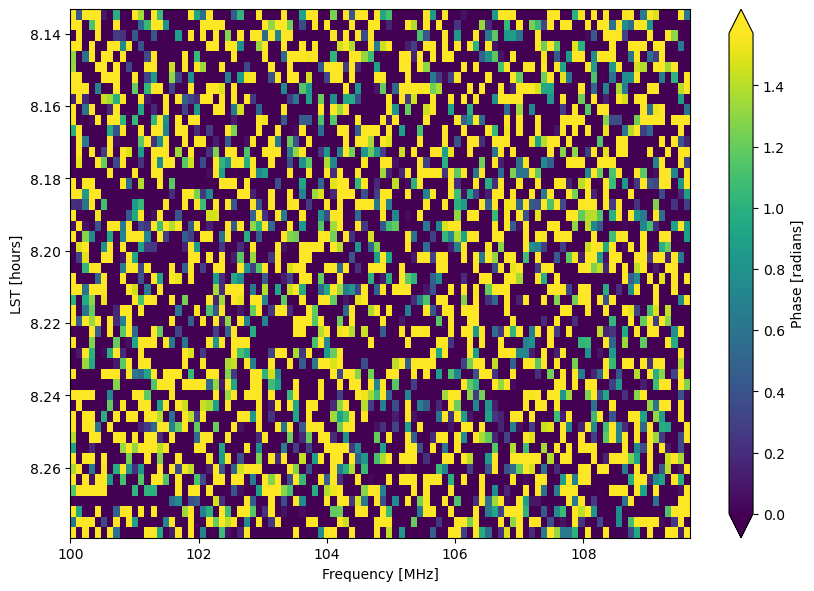

In [11]:
# If we use asymmetric phase bounds, then a non-cyclic, non-diverging colormap
# is used by default
fig, ax = uvtools.plot.labeled_waterfall(
    uvd,
    antpairpol=(0,1,"xx"),
    mode="phs",
    vmin=0,
    vmax=np.pi / 2,
)

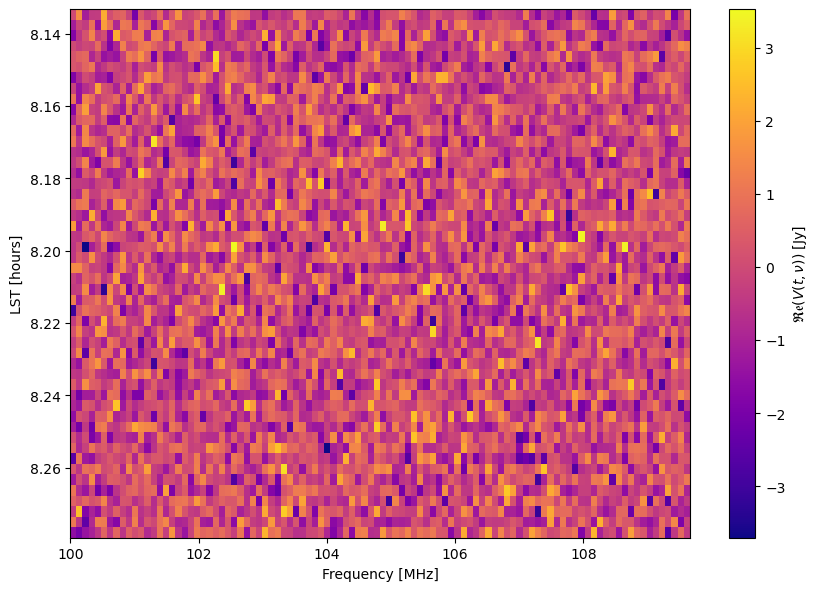

In [12]:
# We can also customize the colormap used
fig, ax = uvtools.plot.labeled_waterfall(
    uvd,
    antpairpol=(0,1,"xx"),
    cmap="plasma",
    mode="real",
)

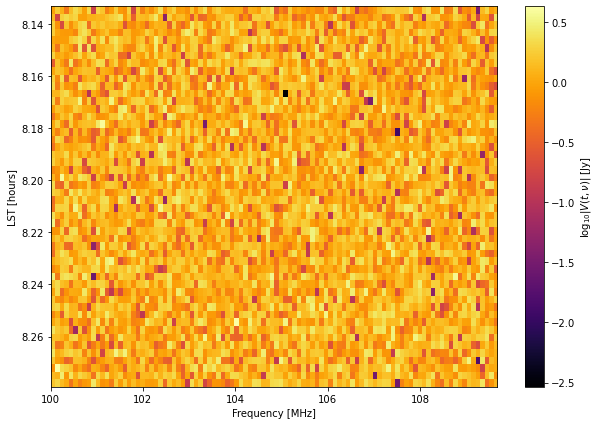

In [13]:
# We can also draw the plot on an existing Axes object
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
fig, ax = uvtools.plot.labeled_waterfall(
    uvd,
    antpairpol=(0,1,"xx"),
    ax=ax,
)

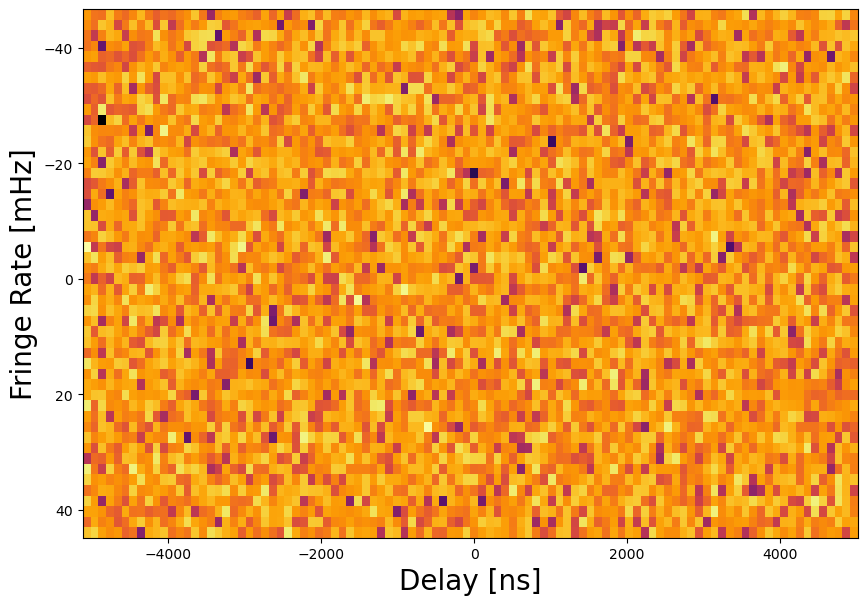

In [14]:
# The colorbar can be turned off, and the fontsize may be adjusted
fig, ax = uvtools.plot.labeled_waterfall(
    uvd,
    antpairpol=(0,1,"xx"),
    draw_colorbar=False,
    fontsize=20,
    fft_axis="both",
)

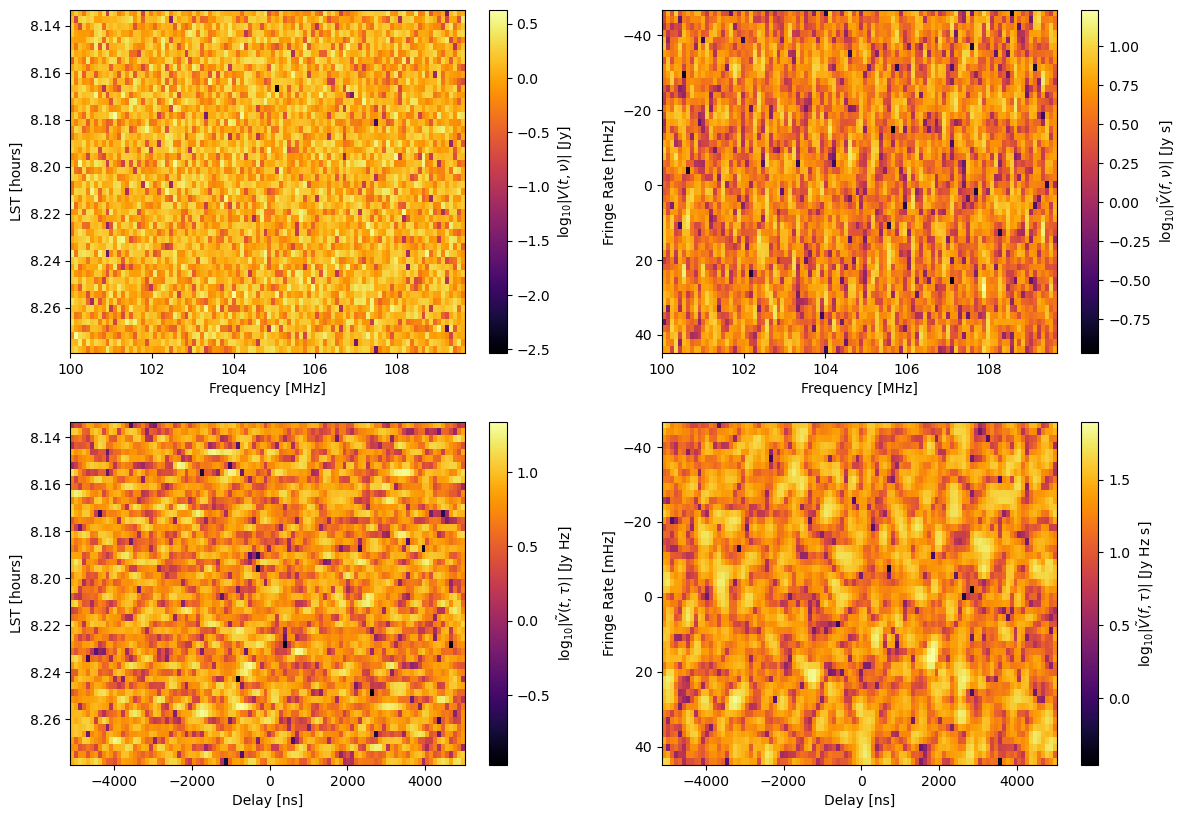

In [15]:
# We can also make a 2x2 grid of plots showing all possible choices of Fourier transforms
fig = uvtools.plot.fourier_transform_waterfalls(
    uvd,
    antpairpol=(0,1,"xx"),
    freq_taper="blackman-harris",
    time_taper="blackman-harris",
)

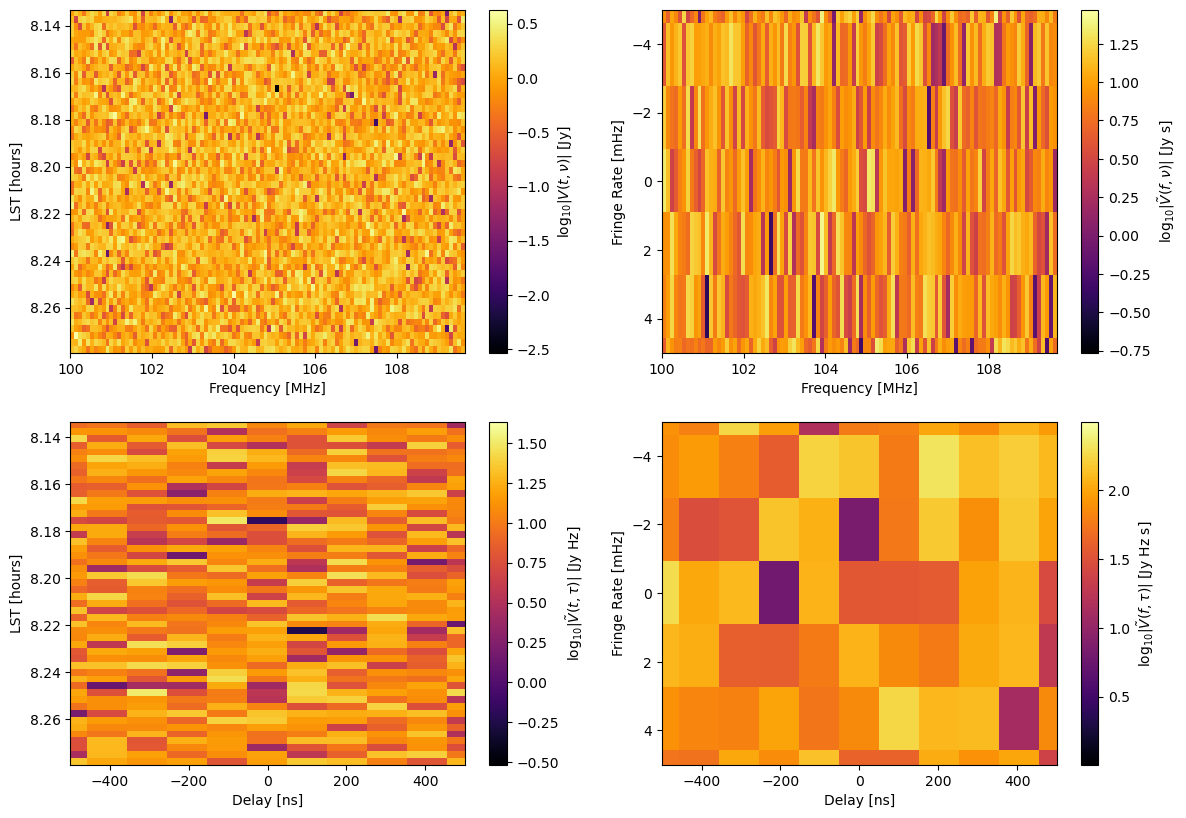

In [16]:
# We can restrict the axis limits as well
fig = uvtools.plot.fourier_transform_waterfalls(
    uvd,
    antpairpol=(0,1,"xx"),
    plot_limits={"delay": (-500,500), "fringe-rate": (5,-5)},
)

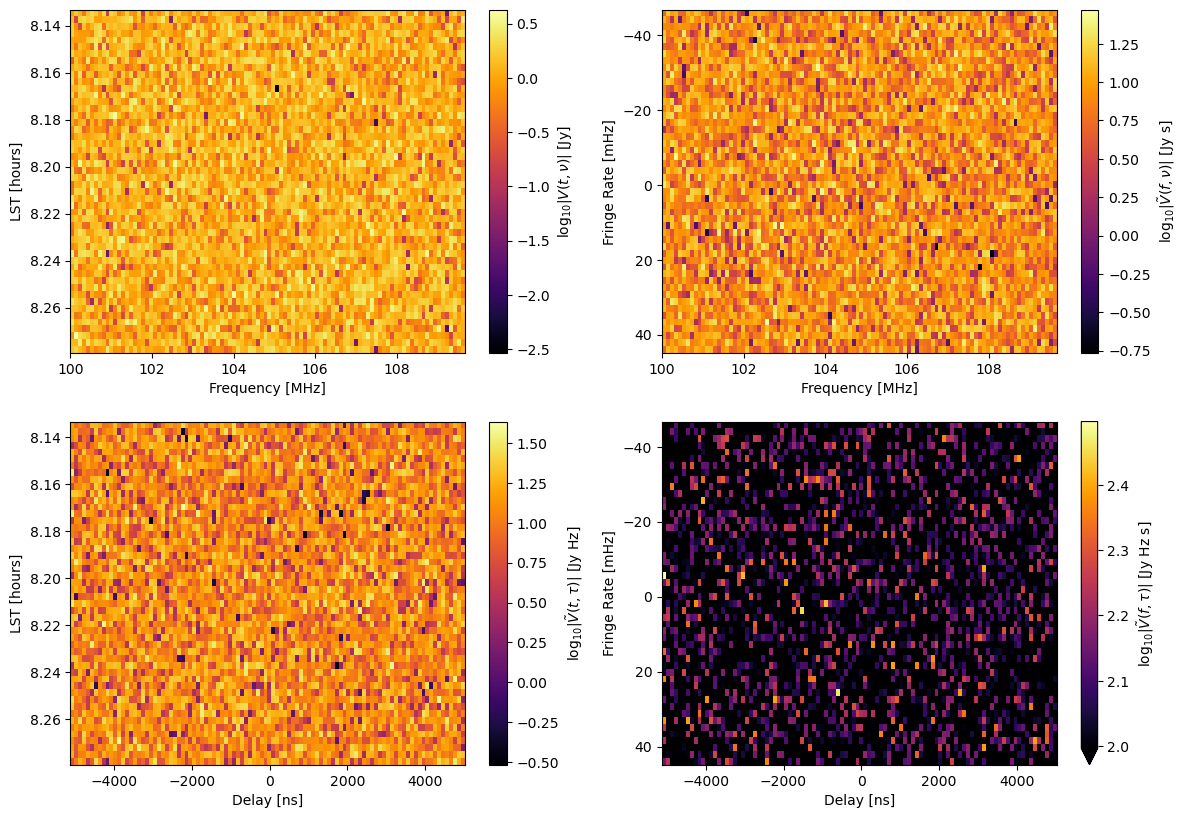

In [17]:
# We can limit the dynamic range on a single plot
fig = uvtools.plot.fourier_transform_waterfalls(
    uvd,
    antpairpol=(0,1,"xx"),
    dynamic_range={("delay","fringe-rate"): 0.5}
)

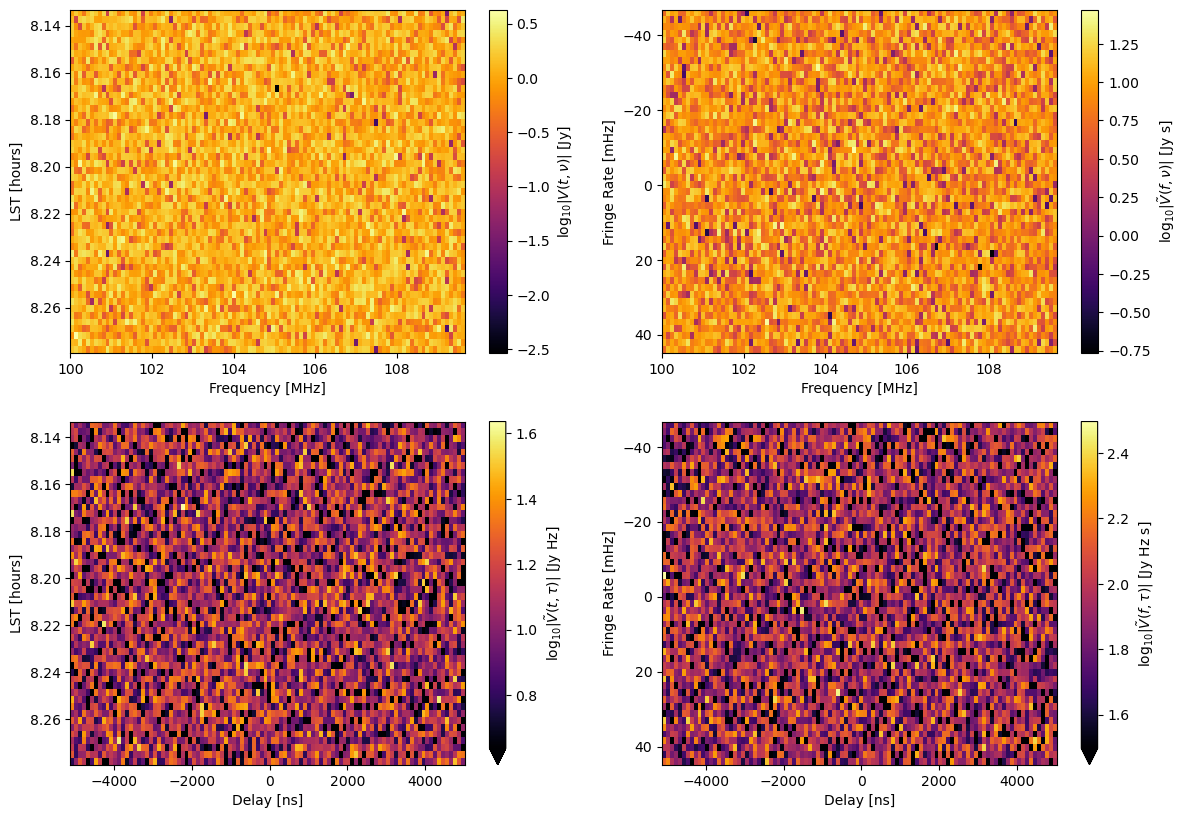

In [18]:
# Or we can limit the dynamic range across a row or column
fig = uvtools.plot.fourier_transform_waterfalls(
    uvd,
    antpairpol=(0,1,"xx"),
    dynamic_range={"delay": 1},
)

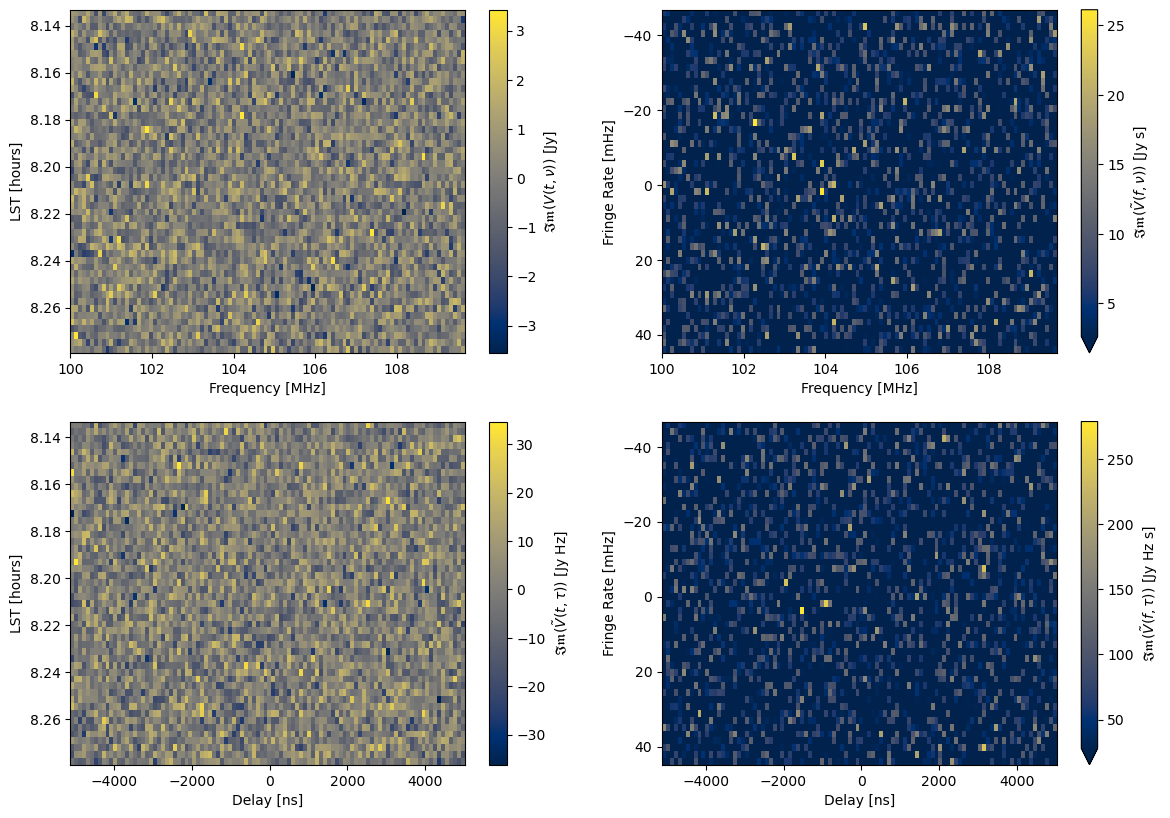

In [19]:
# We can do the Fourier transforms but look at a different data mode
fig = uvtools.plot.fourier_transform_waterfalls(
    uvd,
    antpairpol=(0,1,"xx"),
    mode="imag",
    cmap="cividis",
    dynamic_range={"fringe-rate": 1}, # Limit dynamic range to one OOM for fringe-rate transforms
)